In [1]:
import numpy as np
import cloudytab

In [2]:
m = cloudytab.CloudyModel("models/shell-R005-n30-LP_Ori20")
m2 = cloudytab.CloudyModel("models/shell-R003-n29-LP_Ori20")
m3 = cloudytab.CloudyModel("models/shell-R001-n25-LP_Ori22")

In [3]:
m3.data["ovr"]

depth,Te,Htot,hden,eden,2H_2/H,HI,HII,HeI,HeII,HeIII,CO/C,C1,C2,C3,C4,O1,O2,O3,O4,O5,O6,H2O/O,AV(point),AV(extend)
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.53584e+13,6585.1,1.599e-19,315.02,344.36,1.238e-18,3.1753e-05,0.99997,0.028757,0.97123,1.4203e-05,1.6083e-27,2.2328e-08,0.49339,0.50661,1.4165e-06,3.0349e-05,0.99831,0.0016594,1.1755e-36,1.1755e-36,1.1755e-36,1.1755e-36,5.32e-06,3.84e-06
9.21507e+13,6573.3,1.613e-19,316.83,345.84,1.4279e-18,3.3528e-05,0.99997,0.030243,0.96974,1.3426e-05,1.9482e-27,2.4194e-08,0.50678,0.49322,1.3066e-06,3.2075e-05,0.9984,0.0015653,1.1755e-36,1.1755e-36,1.1755e-36,1.1755e-36,2.67e-05,1.93e-05
1.82401e+14,6545.7,1.726e-19,328.23,357.92,1.6955e-18,3.6748e-05,0.99996,0.033575,0.96641,1.226e-05,2.6804e-27,2.7666e-08,0.52923,0.47077,1.1375e-06,3.5218e-05,0.99855,0.0014164,1.1755e-36,1.1755e-36,1.1755e-36,1.1755e-36,3.71e-05,2.68e-05
2.45952e+14,6535.7,1.802e-19,335.54,366.25,1.9307e-18,3.9092e-05,0.99996,0.035385,0.9646,1.1508e-05,3.3153e-27,3.0264e-08,0.54438,0.45561,1.0343e-06,3.7531e-05,0.99864,0.0013252,1.1755e-36,1.1755e-36,1.1755e-36,1.1755e-36,5e-05,3.61e-05
3.17872e+14,6525.9,1.916e-19,346.57,377.79,2.2552e-18,4.2133e-05,0.99996,0.038189,0.9618,1.0662e-05,4.2992e-27,3.366e-08,0.5624,0.43759,9.2196e-07,4.0523e-05,0.99874,0.0012209,1.1755e-36,1.1755e-36,1.1755e-36,1.1755e-36,6.41e-05,4.64e-05
3.95189e+14,6514.7,2.057e-19,359.64,391.84,2.6752e-18,4.577e-05,0.99995,0.041543,0.95845,9.7939e-06,5.7107e-27,3.7798e-08,0.58211,0.41789,8.107e-07,4.4117e-05,0.99884,0.0011144,1.1755e-36,1.1755e-36,1.1755e-36,1.1755e-36,8e-05,5.78e-05
4.78537e+14,6505.2,2.227e-19,374.71,407.94,3.2121e-18,5.0023e-05,0.99995,0.045527,0.95446,8.935e-06,7.7392e-27,4.2734e-08,0.60294,0.39706,7.0507e-07,4.8341e-05,0.99894,0.0010095,1.1755e-36,1.1755e-36,1.1755e-36,1.1755e-36,9.79e-05,7.07e-05
5.68316e+14,6496.0,2.429e-19,391.67,426.76,3.907e-18,5.5067e-05,0.99994,0.050333,0.94966,8.0838e-06,1.0698e-26,4.8706e-08,0.62502,0.37498,6.0505e-07,5.3376e-05,0.99904,0.00090602,1.1755e-36,1.1755e-36,1.1755e-36,1.1755e-36,0.000118,8.52e-05
6.6514e+14,6485.4,2.654e-19,409.72,446.4,4.7833e-18,6.0789e-05,0.99994,0.055908,0.94408,7.2869e-06,1.4918e-26,5.5584e-08,0.64711,0.35289,5.1599e-07,5.9118e-05,0.99913,0.00080948,1.1755e-36,1.1755e-36,1.1755e-36,1.1755e-36,0.000141,0.000102


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
%matplotlib inline

In [6]:
sns.set_color_codes()
sns.set_context('talk')

In [7]:
import astropy.units as u

In [8]:
u.cm.to(u.pc)

3.240779289469756e-19

In [9]:
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
AV = m.data["ovr"]["AV(point)"]
r_pc2 = m2.data["rad"]["radius"]*u.cm.to(u.pc)
r_pc3 = m3.data["rad"]["radius"]*u.cm.to(u.pc)
AV3 = m3.data["ovr"]["AV(point)"]

Plot density and temperature against radius in parsec

[None, (0, 0.011848215516611558), Text(0.5,0,'Radius, pc')]

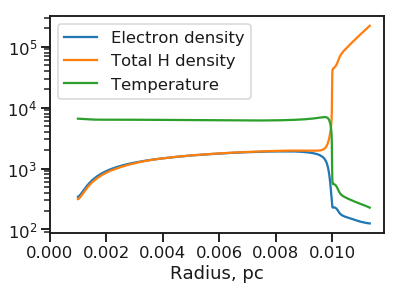

In [10]:
fig, ax = plt.subplots()
ax.plot(r_pc3, m3.data["ovr"]["eden"], label=r"Electron density")
ax.plot(r_pc3, m3.data["ovr"]["hden"], label=r"Total H density")
ax.plot(r_pc3, m3.data["ovr"]["Te"], label=r"Temperature")
ax.legend()
ax.set(xlim=[0, None], yscale='log', xlabel="Radius, pc")

[None, (0, 0.31499973399999998)]

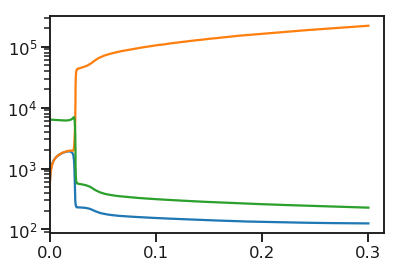

In [11]:
fig, ax = plt.subplots()
ax.plot(AV3, m3.data["ovr"]["eden"])
ax.plot(AV3, m3.data["ovr"]["hden"])
ax.plot(AV3, m3.data["ovr"]["Te"])

ax.set(xlim=[0, None], yscale='log')

Compare the canonical model with the lower density, smaller radius one

[None, (0, 0.01205490269735607), Text(0.5,0,'Radius, pc')]

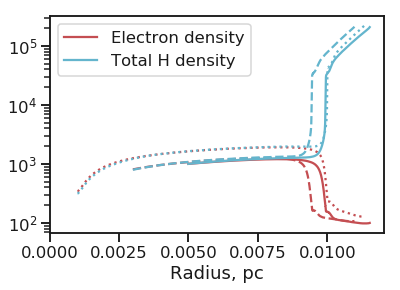

In [12]:
fig, ax = plt.subplots()

ax.plot(r_pc, m.data["ovr"]["eden"], color="r", label=r"Electron density")
ax.plot(r_pc2, m2.data["ovr"]["eden"], color="r", ls="--", label="_nolabel_")
ax.plot(r_pc3, m3.data["ovr"]["eden"], color="r", ls=":", label="_nolabel_")


ax.plot(r_pc, m.data["ovr"]["hden"], color="c", label=r"Total H density")
ax.plot(r_pc2, m2.data["ovr"]["hden"], color="c", ls="--", label="_nolabel_")
ax.plot(r_pc3, m3.data["ovr"]["hden"], color="c", ls=":", label="_nolabel_")


ax.legend()
ax.set(xlim=[0, None], yscale='log', xlabel="Radius, pc")

So, the low-density one is too low, and hence the i-front is at too large a radius. We need to try ones where we don't change the density so much. 

Look again on a linear scale, with just the pressure.

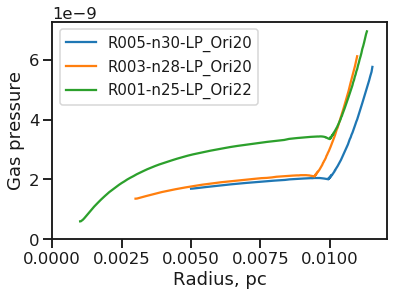

In [13]:
fig, ax = plt.subplots()

def Pgas(ovr_tab):
    return (ovr_tab["eden"] + ovr_tab["hden"])*ovr_tab["Te"]*1.38e-16

ax.plot(r_pc, Pgas(m.data["ovr"]), label=r"R005-n30-LP_Ori20")
ax.plot(r_pc2, Pgas(m2.data["ovr"]), label="R003-n28-LP_Ori20")
ax.plot(r_pc3, Pgas(m3.data["ovr"]), label="R001-n25-LP_Ori22")


ax.legend(loc="upper left", fontsize="small")
ax.set(xlim=[0, None], ylim=[0, None], yscale='linear', xlabel="Radius, pc", ylabel="Gas pressure")
None

## New improved models

Look at each of the new models

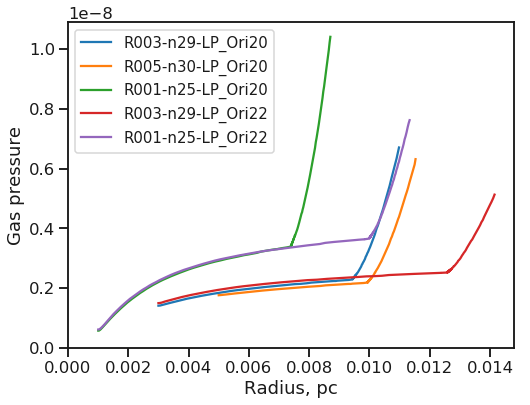

In [14]:
models = ["R003-n29-LP_Ori20", "R005-n30-LP_Ori20", "R001-n25-LP_Ori20", "R003-n29-LP_Ori22", "R001-n25-LP_Ori22"]

fig, ax = plt.subplots(figsize=(8, 6))

for label in models:
    m = cloudytab.CloudyModel(f"models/shell-{label}")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["pre"]["Pgas"], label=label)
    
ax.legend(loc="upper left", fontsize="small")
ax.set(xlim=[0, None], ylim=[0, None], yscale='linear', xlabel="Radius, pc", ylabel="Gas pressure")
None

And the same for the low dust opacity models

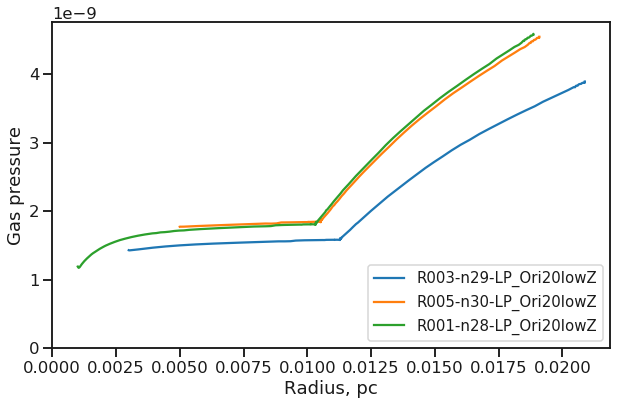

In [15]:
models = ["R003-n29-LP_Ori20", "R005-n30-LP_Ori20", "R001-n28-LP_Ori20"]


fig, ax = plt.subplots(figsize=(10, 6))

for label in models:
    m = cloudytab.CloudyModel(f"models/shell-{label}lowZ")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["pre"]["Pgas"], label=label+"lowZ")
    
ax.legend(loc="lower right", fontsize="small")
ax.set(xlim=[0, None], ylim=[0, None], yscale='linear', xlabel="Radius, pc", ylabel="Gas pressure")
None

That is better now, but it looks like the shells are too thick.  Now look at the densities.

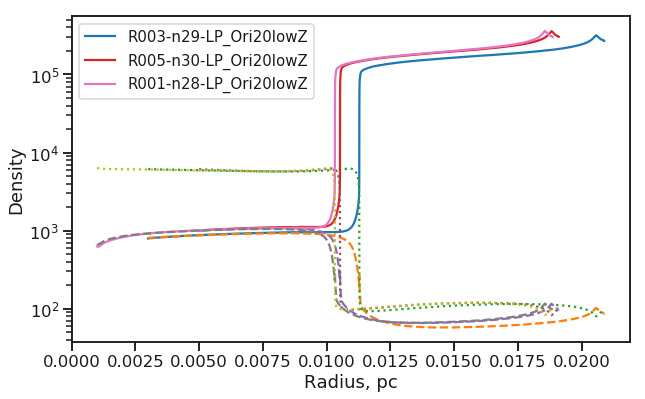

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

for label in models:
    m = cloudytab.CloudyModel(f"models/shell-{label}lowZ")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["ovr"]["hden"], label=label+"lowZ")
    ax.plot(r_pc, m.data["ovr"]["eden"], ls="--", label="_nolabel_")
    ax.plot(r_pc, m.data["ovr"]["Te"], ls=":", label="_nolabel_")


    
ax.legend(loc="upper left", fontsize="small")
ax.set(xlim=[0, None], ylim=[None, None], yscale='log', xlabel="Radius, pc", ylabel="Density")
None

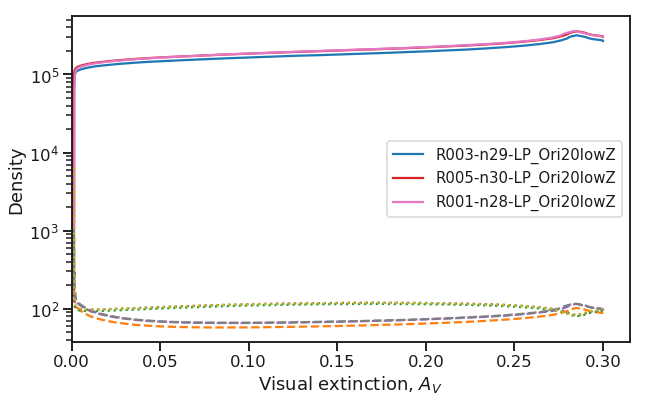

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

for label in models:
    m = cloudytab.CloudyModel(f"models/shell-{label}lowZ")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    AV = m.data["ovr"]["AV(point)"]
    ax.plot(AV, m.data["ovr"]["hden"], label=label+"lowZ")
    ax.plot(AV, m.data["ovr"]["eden"], ls="--", label="_nolabel_")
    ax.plot(AV, m.data["ovr"]["Te"], ls=":", label="_nolabel_")


    
ax.legend(loc="right", fontsize="small")
ax.set(xlim=[0, None], ylim=[None, None], yscale='log', xlabel="Visual extinction, $A_V$", ylabel="Density")
None

So the problem was that we never got to the requested $A_V$.  The models hit the $T=100$ K first, and stopped because of that. I have changed the floor to 10 K, so they now do reach $A_V = 0.3$, but now they are too thick. 

And the magnetic field models

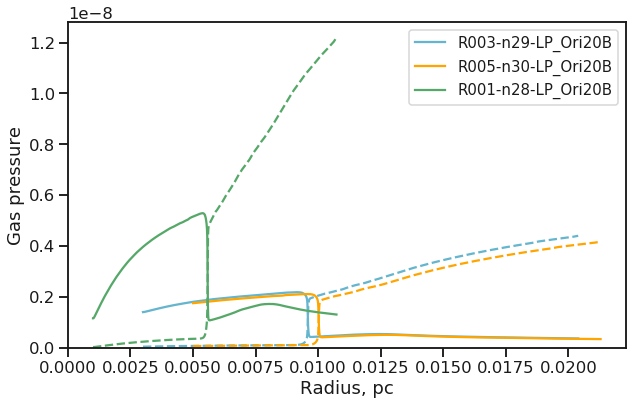

In [18]:
models = ["R003-n29-LP_Ori20", "R005-n30-LP_Ori20", "R001-n28-LP_Ori20"]


fig, ax = plt.subplots(figsize=(10, 6))

for label, color in zip(models, ["c", "orange", "g"]):
    m = cloudytab.CloudyModel(f"models/shell-{label}B")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["pre"]["Pgas"], color=color, label=label+"B")
    ax.plot(r_pc, m.data["pre"]["P(mag)"] + m.data["pre"]["P(turb)"], ls="--", color=color, label="_nolabel_")
    
ax.legend(loc="upper right", fontsize="small")
ax.set(xlim=[0, None], ylim=[0, None], yscale='linear', xlabel="Radius, pc", ylabel="Gas pressure")
None

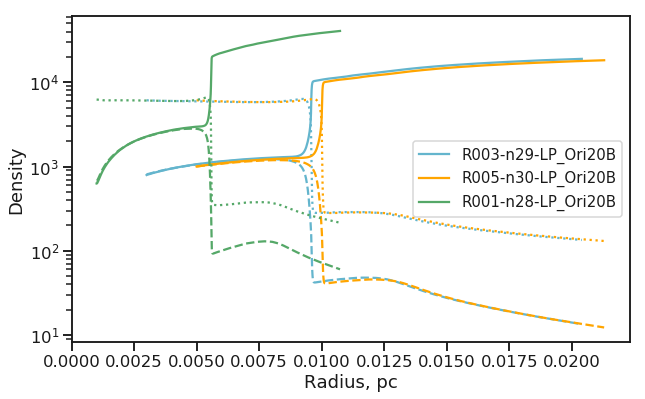

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

for label, color in zip(models, ["c", "orange", "g"]):
    m = cloudytab.CloudyModel(f"models/shell-{label}B")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["ovr"]["hden"], color=color, label=label+"B")
    ax.plot(r_pc, m.data["ovr"]["eden"], color=color, ls="--", label="_nolabel_")
    ax.plot(r_pc, m.data["ovr"]["Te"], color=color, ls=":", label="_nolabel_")


    
ax.legend(loc="right", fontsize="small")
ax.set(xlim=[0, None], ylim=[None, None], yscale='log', xlabel="Radius, pc", ylabel="Density")
None

Repeat for the models with constant Alfven speed

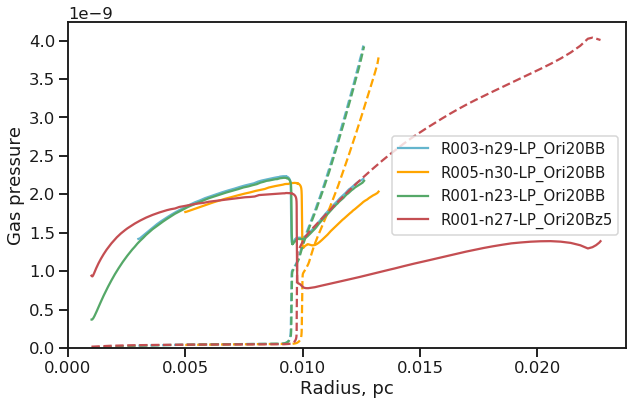

In [20]:
models = ["R003-n29-LP_Ori20BB", "R005-n30-LP_Ori20BB", "R001-n23-LP_Ori20BB", "R001-n27-LP_Ori20Bz5"]


fig, ax = plt.subplots(figsize=(10, 6))

for label, color in zip(models, ["c", "orange", "g", "r"]):
    m = cloudytab.CloudyModel(f"models/shell-{label}")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["pre"]["Pgas"], color=color, label=label)
    ax.plot(r_pc, m.data["pre"]["P(mag)"] + m.data["pre"]["P(turb)"], ls="--", color=color, label="_nolabel_")
    
ax.legend(loc="right", fontsize="small")
ax.set(xlim=[0, None], ylim=[0, None], yscale='linear', xlabel="Radius, pc", ylabel="Gas pressure")
None

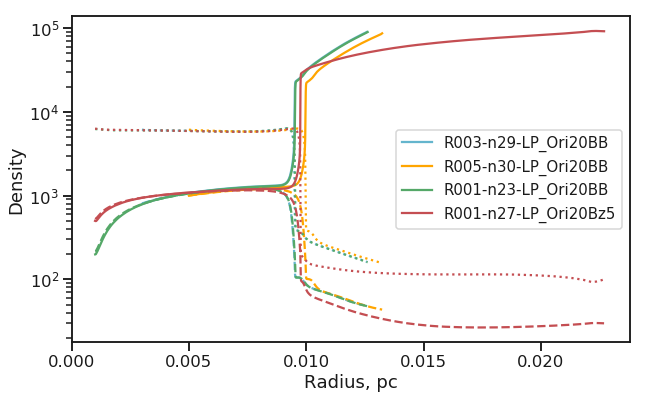

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

for label, color in zip(models, ["c", "orange", "g", "r"]):
    m = cloudytab.CloudyModel(f"models/shell-{label}")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["ovr"]["hden"], color=color, label=label)
    ax.plot(r_pc, m.data["ovr"]["eden"], color=color, ls="--", label="_nolabel_")
    ax.plot(r_pc, m.data["ovr"]["Te"], color=color, ls=":", label="_nolabel_")


    
ax.legend(loc="right", fontsize="small")
ax.set(xlim=[0, None], ylim=[None, None], yscale='log', xlabel="Radius, pc", ylabel="Density")
None

## Emissivity profiles

In [22]:
label = "R003-n29-LP_Ori20"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]

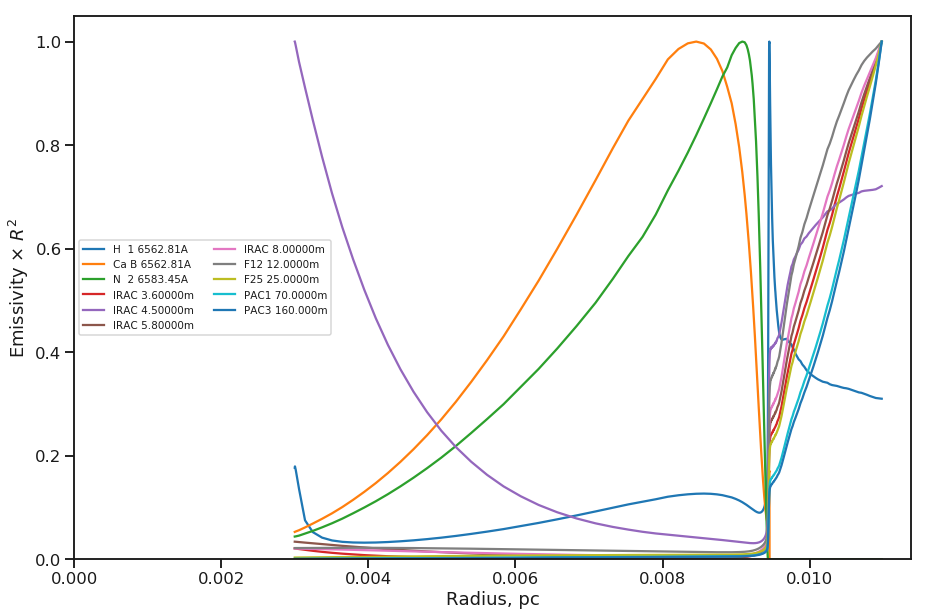

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
drop_these_bands = "O  3 5006.84A", "nInu 6209.66A", "InwT 6209.66A", "H-CT 6562.81A", "Dest 6562.81A", "Ca A 6562.81A"

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]*(r_pc/0.01)**2
    ax.plot(r_pc, e/np.max(e), label=band)
    
ax.legend(ncol=2, fontsize="xx-small")
ax.set(xlim=[0, None], yscale='linear', ylim=[0.0, 1.05], xlabel="Radius, pc", ylabel=r"Emissivity $\times\ R^2$")
None

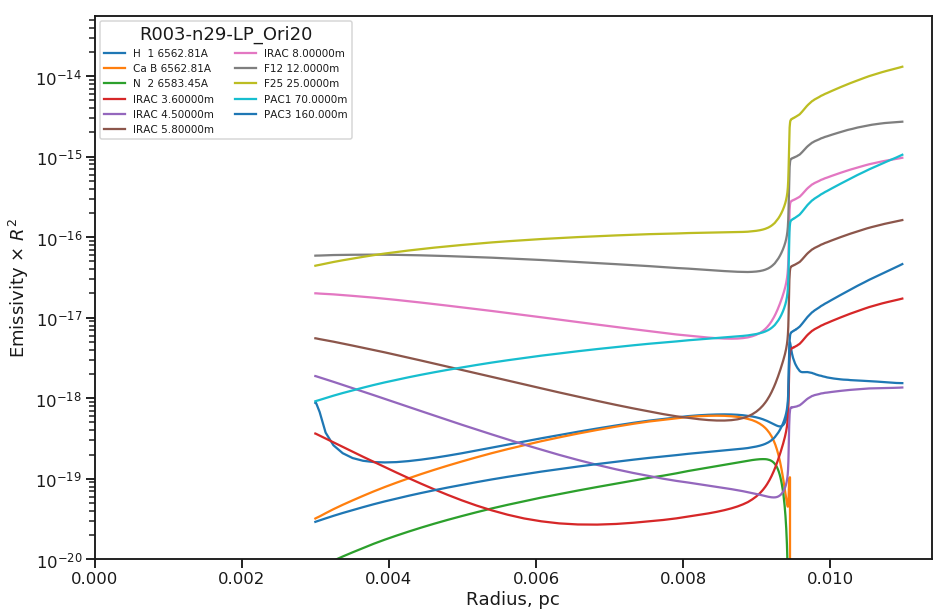

In [24]:
fig, ax = plt.subplots(figsize=(15, 10))
for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]*(r_pc/0.01)**2
    ax.plot(r_pc, e, label=band)
    
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[1e-20, None], xlabel="Radius, pc", ylabel=r"Emissivity $\times\ R^2$")
None

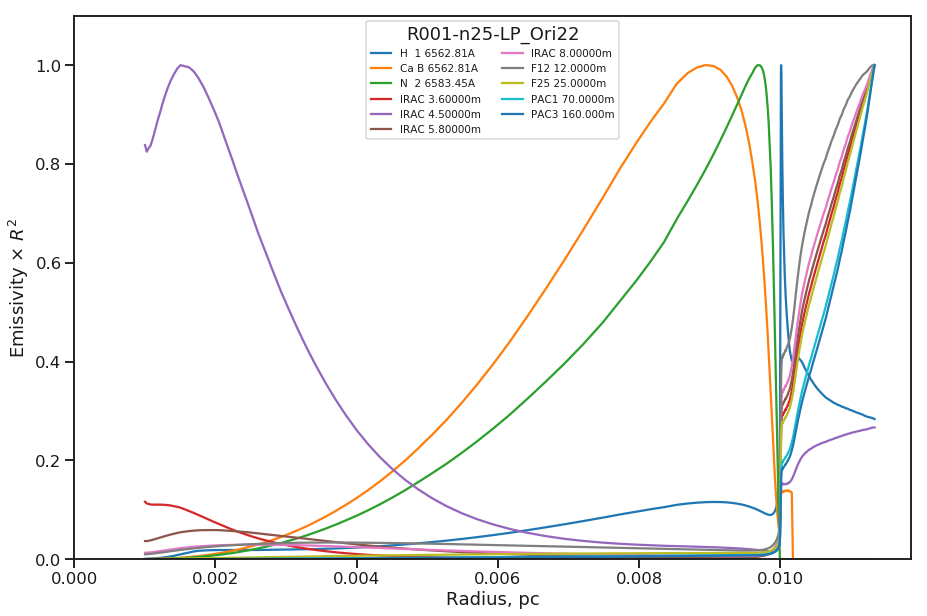

In [25]:
label = "R001-n25-LP_Ori22"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]*(r_pc/0.01)**2
    ax.plot(r_pc, e/np.max(e), label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='linear', ylim=[0.0, 1.1], xlabel="Radius, pc", ylabel=r"Emissivity $\times\ R^2$")
None

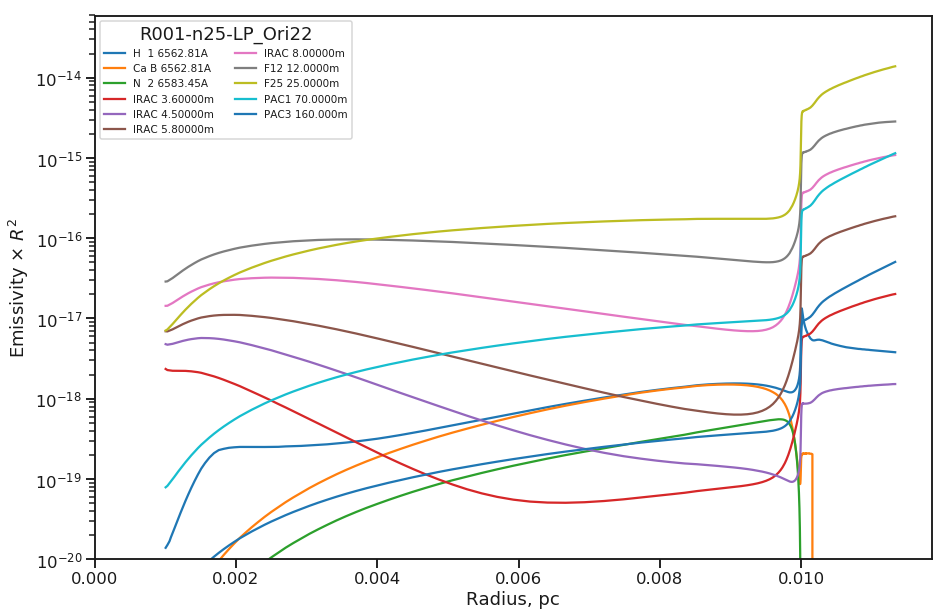

In [26]:
label = "R001-n25-LP_Ori22"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]
    ax.plot(r_pc, e*(r_pc/0.01)**2, label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[1e-20, None], xlabel="Radius, pc", ylabel=r"Emissivity $\times\ R^2$")
None

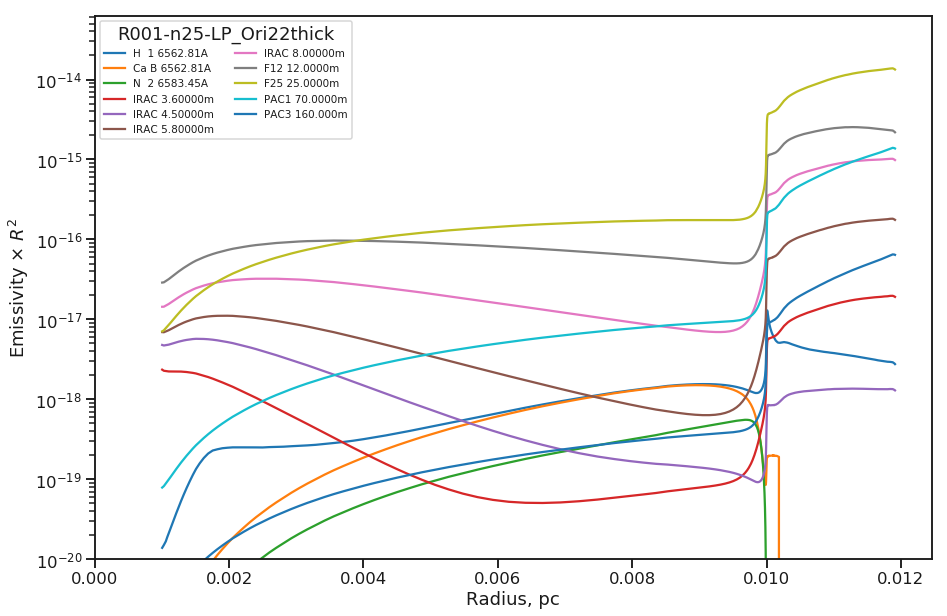

In [27]:
label = "R001-n25-LP_Ori22thick"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]
    ax.plot(r_pc, e*(r_pc/0.01)**2, label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[1e-20, None], xlabel="Radius, pc", ylabel=r"Emissivity $\times\ R^2$")
None

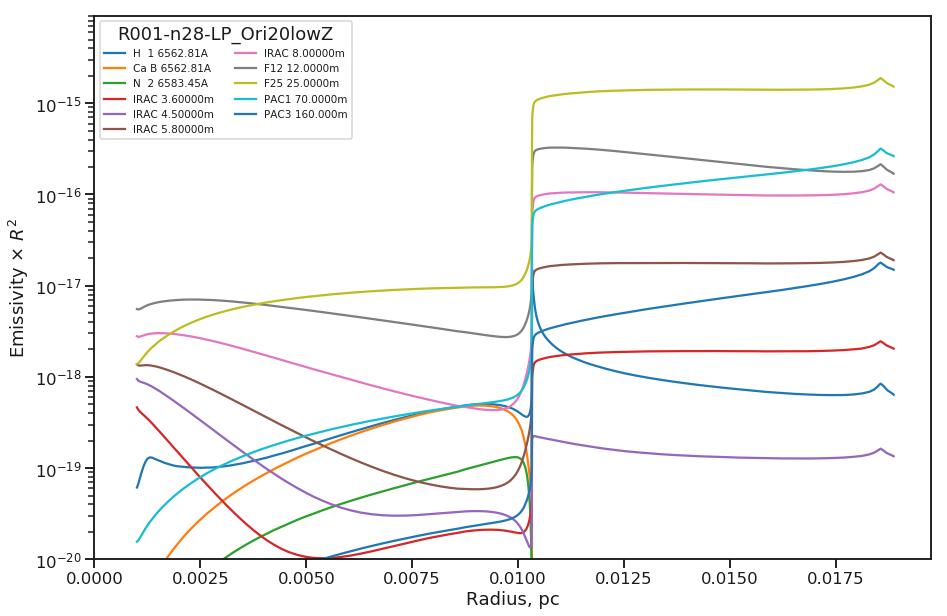

In [28]:
label = "R001-n28-LP_Ori20lowZ"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]
    ax.plot(r_pc, e*(r_pc/0.01)**2, label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[1e-20, None], xlabel="Radius, pc", ylabel=r"Emissivity $\times\ R^2$")
None

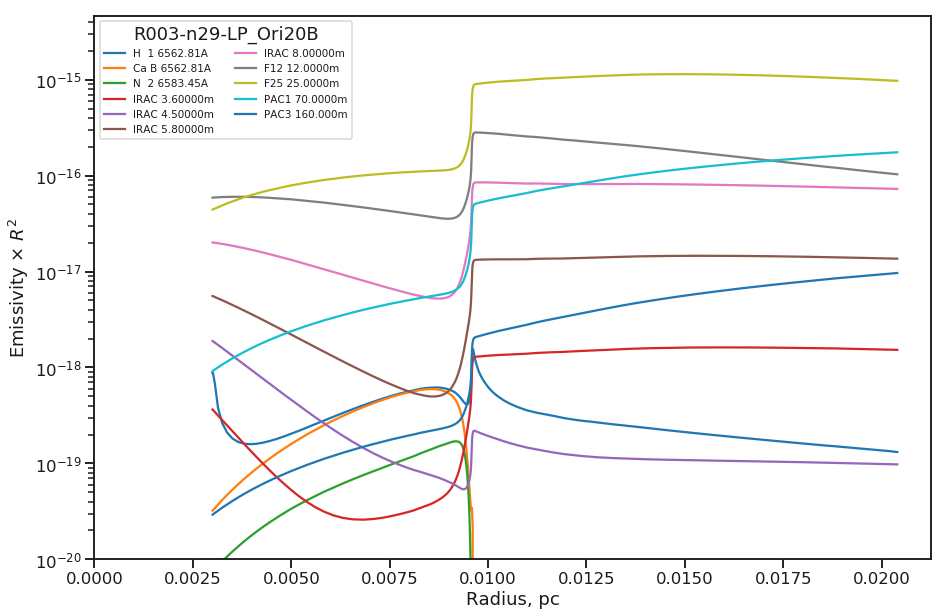

In [29]:
label = "R003-n29-LP_Ori20B"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]
    ax.plot(r_pc, e*(r_pc/0.01)**2, label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[1e-20, None], xlabel="Radius, pc", ylabel=r"Emissivity $\times\ R^2$")
None

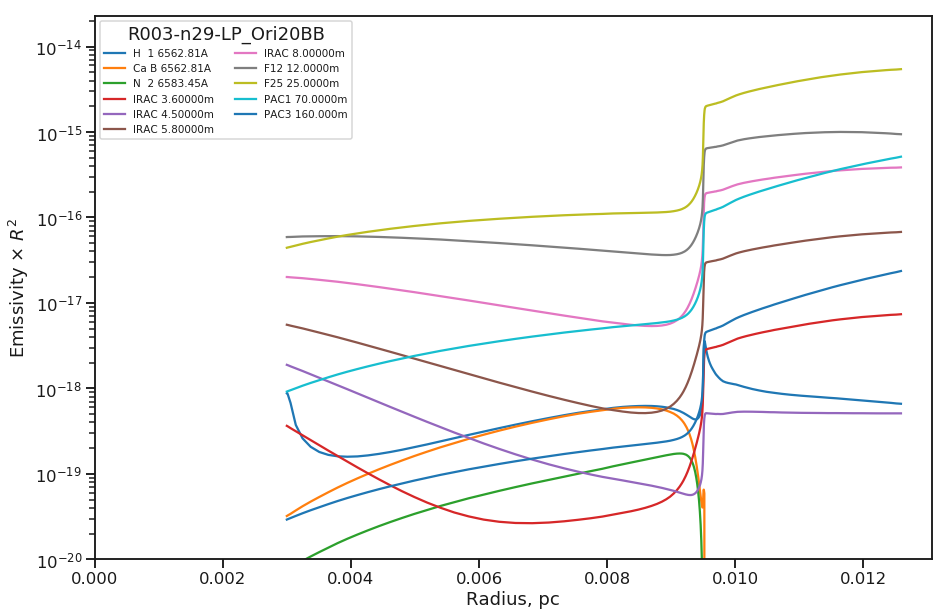

In [30]:
label = "R003-n29-LP_Ori20BB"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]
    ax.plot(r_pc, e*(r_pc/0.01)**2, label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[1e-20, None], xlabel="Radius, pc", ylabel=r"Emissivity $\times\ R^2$")
None

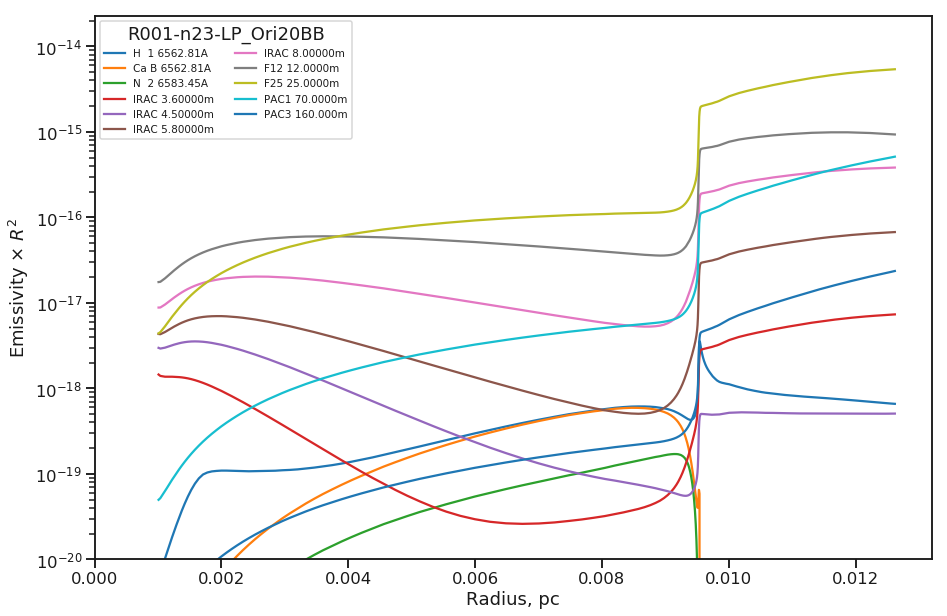

In [31]:
label = "R001-n23-LP_Ori20BB"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]
    ax.plot(r_pc, e*(r_pc/0.01)**2, label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[1e-20, None], xlabel="Radius, pc", ylabel=r"Emissivity $\times\ R^2$")
None

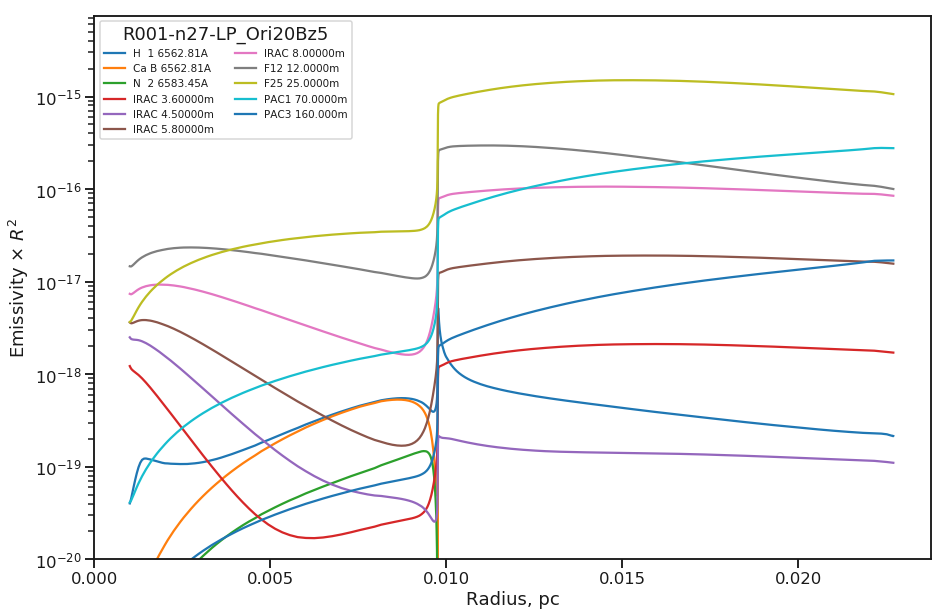

In [32]:
label = "R001-n27-LP_Ori20Bz5"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]
    ax.plot(r_pc, e*(r_pc/0.01)**2, label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[1e-20, None], xlabel="Radius, pc", ylabel=r"Emissivity $\times\ R^2$")
None

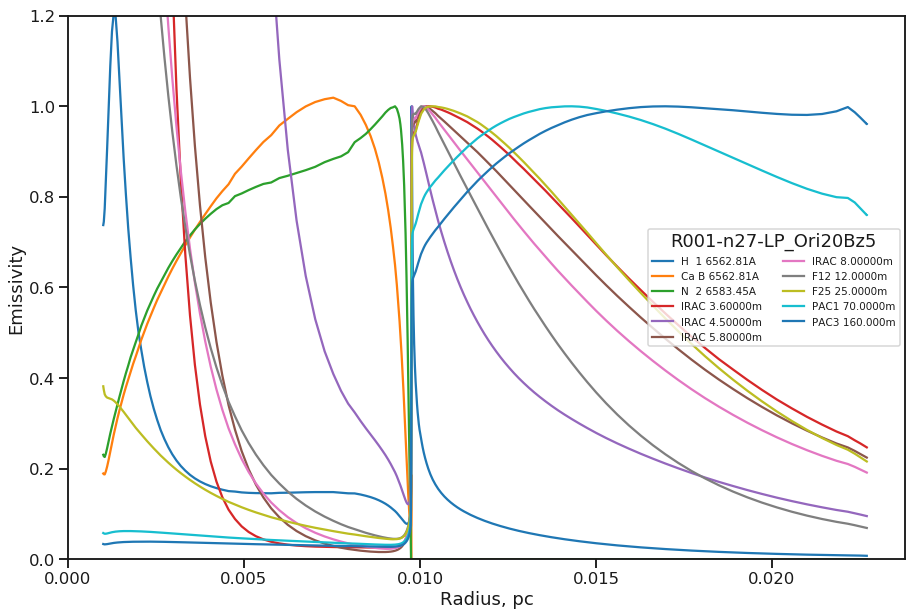

In [33]:
label = "R001-n27-LP_Ori20Bz5"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]
    ax.plot(r_pc, e/e[r_pc > 0.008].max(), label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='linear', ylim=[0.0, 1.2], xlabel="Radius, pc", ylabel=r"Emissivity")
None

## Grain drift

It looks like the grains become uncoupled at the smallest radii

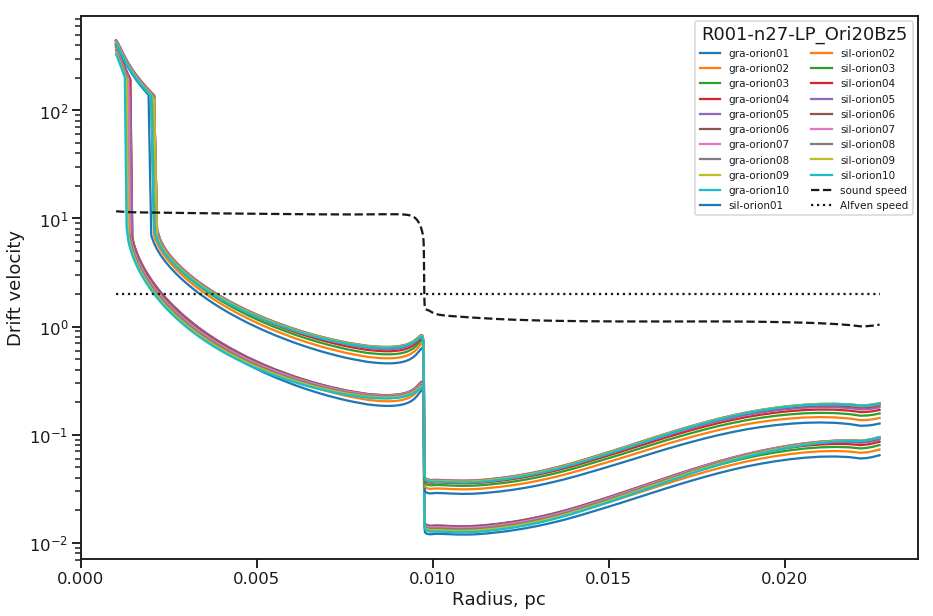

In [34]:
#label = "R001-n23-LP_Ori20BB"
label = "R001-n27-LP_Ori20Bz5"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
vdrift= m.data["gdrift"]
fig, ax = plt.subplots(figsize=(15, 10))

for grain in vdrift.colnames[1:]:
    if grain.startswith("pah"):
        continue
    v = vdrift[grain]
    ax.plot(r_pc, v, label=grain)
    
ax.plot(r_pc, m.data["pre"]["cad(wind km/s)"], ls="--", color="k", label="sound speed")
ax.plot(r_pc, 2.0*np.ones_like(r_pc), ls=":", color="k", label="Alfven speed")

ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[None, None], xlabel="Radius, pc", ylabel=r"Drift velocity")
None

So, the drift velocity is safely subsonic and sub-alfvenic in the shell and in the outer part of the ionized gas.

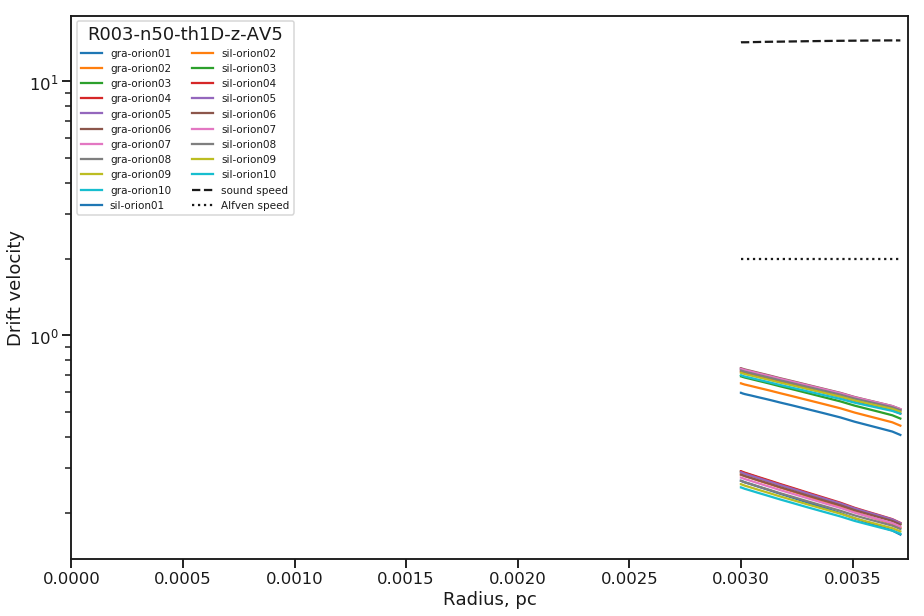

In [42]:
label = "R003-n50-th1D-z-AV5"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
vdrift= m.data["gdrift"]
fig, ax = plt.subplots(figsize=(15, 10))

for grain in vdrift.colnames[1:]:
    if grain.startswith("pah"):
        continue
    v = vdrift[grain]
    ax.plot(r_pc, v, label=grain)
    
ax.plot(r_pc, m.data["pre"]["cad(wind km/s)"], ls="--", color="k", label="sound speed")
ax.plot(r_pc, 2.0*np.ones_like(r_pc), ls=":", color="k", label="Alfven speed")

ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[None, None], xlabel="Radius, pc", ylabel=r"Drift velocity")
None

## Look at theta 1 D

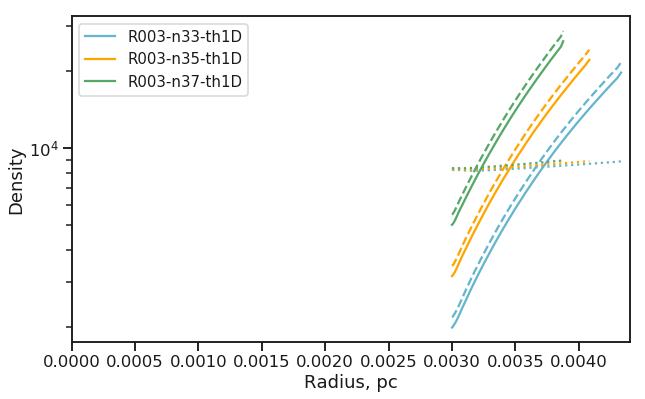

In [36]:
models = [f"R003-{_}-th1D" for _ in ["n33", "n35", "n37"]]

fig, ax = plt.subplots(figsize=(10, 6))

for label, color in zip(models, ["c", "orange", "g"]):
    m = cloudytab.CloudyModel(f"models/shell-{label}")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["ovr"]["hden"], color=color, label=label)
    ax.plot(r_pc, m.data["ovr"]["eden"], color=color, ls="--", label="_nolabel_")
    ax.plot(r_pc, m.data["ovr"]["Te"], color=color, ls=":", label="_nolabel_")


    
ax.legend(loc="best", fontsize="small")
ax.set(xlim=[0, None], ylim=[None, None], yscale='log', xlabel="Radius, pc", ylabel="Density")
None

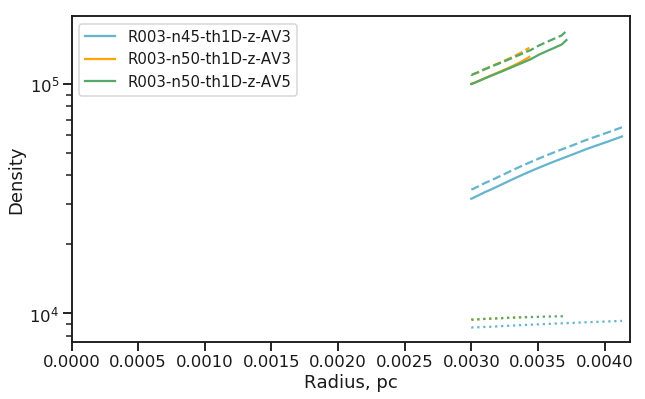

In [37]:
models = ["R003-n45-th1D-z-AV3", "R003-n50-th1D-z-AV3", "R003-n50-th1D-z-AV5"]

fig, ax = plt.subplots(figsize=(10, 6))

for label, color in zip(models, ["c", "orange", "g"]):
    m = cloudytab.CloudyModel(f"models/shell-{label}")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["ovr"]["hden"], color=color, label=label)
    ax.plot(r_pc, m.data["ovr"]["eden"], color=color, ls="--", label="_nolabel_")
    ax.plot(r_pc, m.data["ovr"]["Te"], color=color, ls=":", label="_nolabel_")


    
ax.legend(loc="best", fontsize="small")
ax.set(xlim=[0, None], ylim=[None, None], yscale='log', xlabel="Radius, pc", ylabel="Density")
None

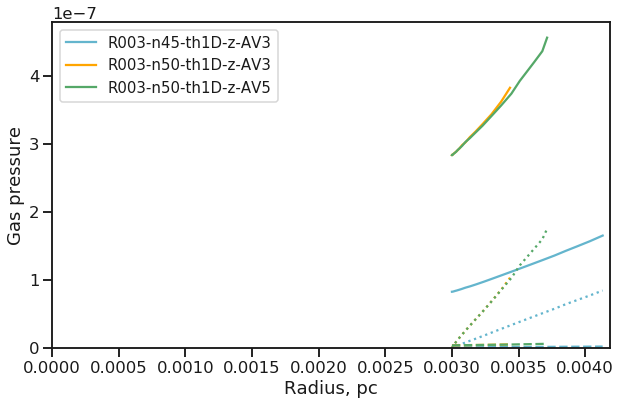

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))

for label, color in zip(models, ["c", "orange", "g"]):
    m = cloudytab.CloudyModel(f"models/shell-{label}")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["pre"]["Pgas"], color=color, label=label)
    ax.plot(r_pc, m.data["pre"]["P(mag)"] + m.data["pre"]["P(turb)"], ls="--", color=color, label="_nolabel_")
    ax.plot(r_pc, m.data["pre"]["Pinteg"], ls=":", color=color, label="_nolabel_")
    
ax.legend(loc="best", fontsize="small")
ax.set(xlim=[0, None], ylim=[0, None], yscale='linear', xlabel="Radius, pc", ylabel="Gas pressure")
None

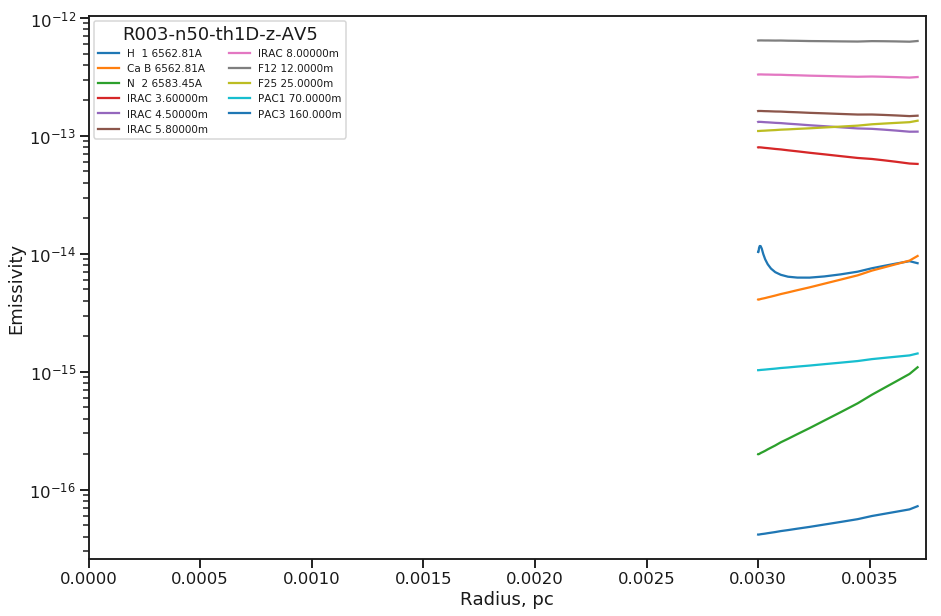

In [41]:
label = "R003-n50-th1D-z-AV5"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]
    ax.plot(r_pc, e, label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[None, None], xlabel="Radius, pc", ylabel=r"Emissivity")
None

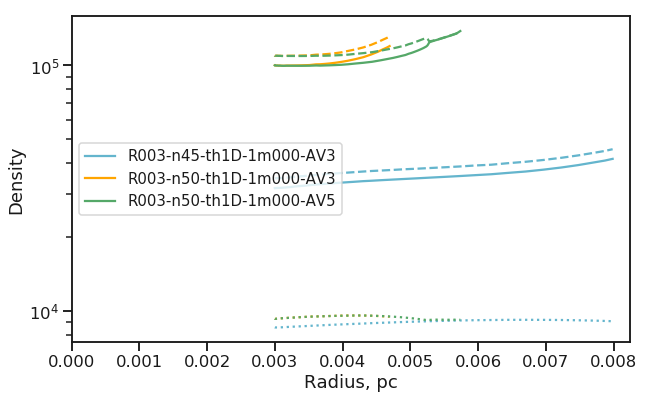

In [43]:
models = ["R003-n45-th1D-1m000-AV3", "R003-n50-th1D-1m000-AV3", "R003-n50-th1D-1m000-AV5"]

fig, ax = plt.subplots(figsize=(10, 6))

for label, color in zip(models, ["c", "orange", "g"]):
    m = cloudytab.CloudyModel(f"models/shell-{label}")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["ovr"]["hden"], color=color, label=label)
    ax.plot(r_pc, m.data["ovr"]["eden"], color=color, ls="--", label="_nolabel_")
    ax.plot(r_pc, m.data["ovr"]["Te"], color=color, ls=":", label="_nolabel_")


    
ax.legend(loc="best", fontsize="small")
ax.set(xlim=[0, None], ylim=[None, None], yscale='log', xlabel="Radius, pc", ylabel="Density")
None

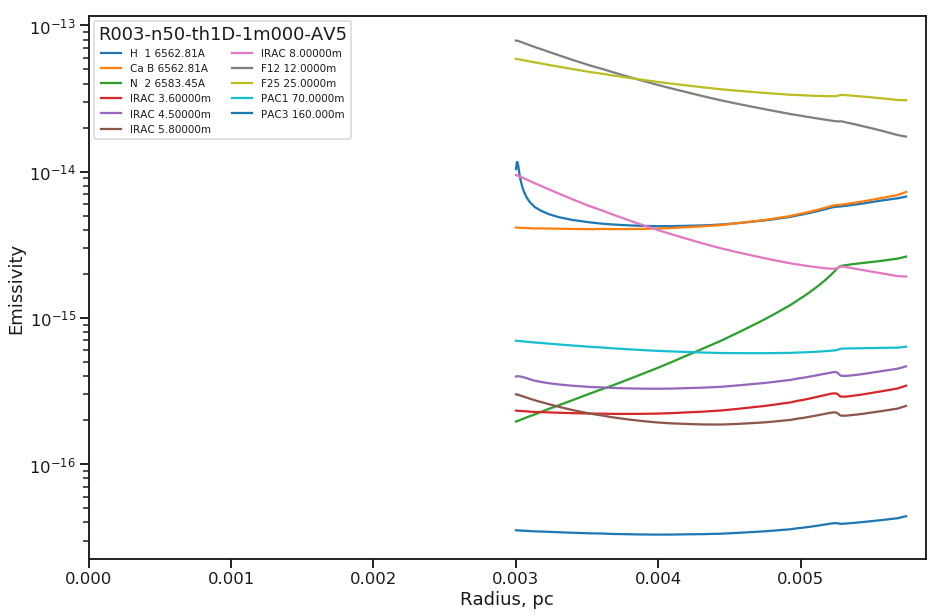

In [44]:
label = "R003-n50-th1D-1m000-AV5"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]
    ax.plot(r_pc, e, label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[None, None], xlabel="Radius, pc", ylabel=r"Emissivity")
None

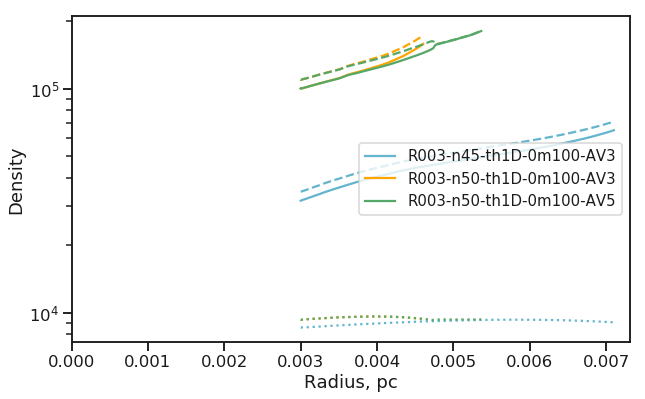

In [45]:
models = ["R003-n45-th1D-0m100-AV3", "R003-n50-th1D-0m100-AV3", "R003-n50-th1D-0m100-AV5"]

fig, ax = plt.subplots(figsize=(10, 6))

for label, color in zip(models, ["c", "orange", "g"]):
    m = cloudytab.CloudyModel(f"models/shell-{label}")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["ovr"]["hden"], color=color, label=label)
    ax.plot(r_pc, m.data["ovr"]["eden"], color=color, ls="--", label="_nolabel_")
    ax.plot(r_pc, m.data["ovr"]["Te"], color=color, ls=":", label="_nolabel_")


    
ax.legend(loc="best", fontsize="small")
ax.set(xlim=[0, None], ylim=[None, None], yscale='log', xlabel="Radius, pc", ylabel="Density")
None

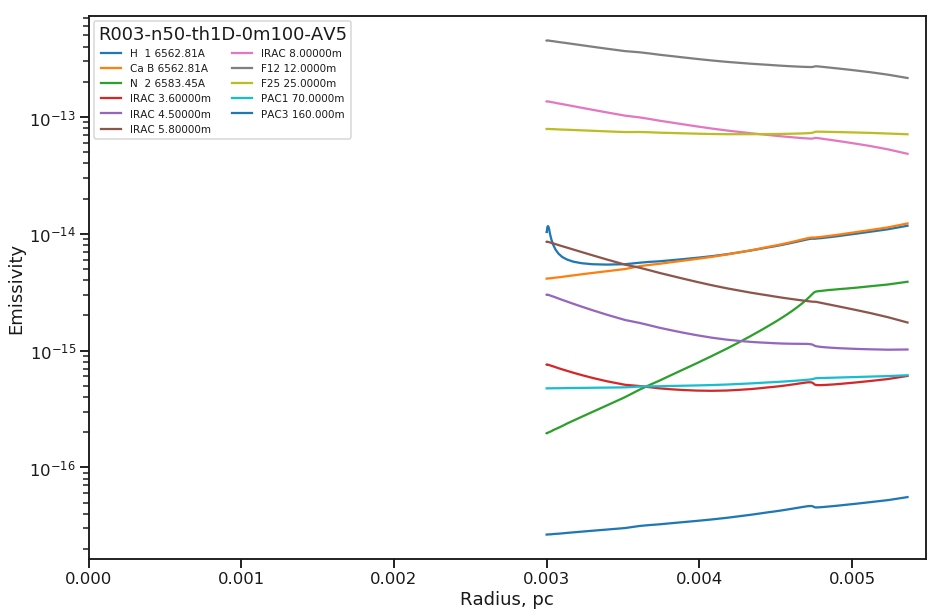

In [46]:
label = "R003-n50-th1D-0m100-AV5"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]
    ax.plot(r_pc, e, label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[None, None], xlabel="Radius, pc", ylabel=r"Emissivity")
None

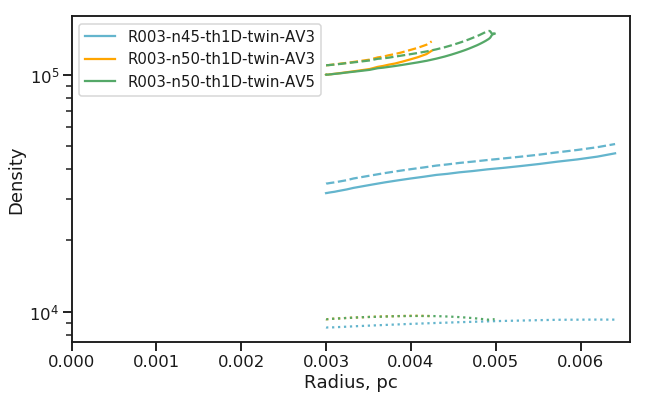

In [47]:
models = ["R003-n45-th1D-twin-AV3", "R003-n50-th1D-twin-AV3", "R003-n50-th1D-twin-AV5"]

fig, ax = plt.subplots(figsize=(10, 6))

for label, color in zip(models, ["c", "orange", "g"]):
    m = cloudytab.CloudyModel(f"models/shell-{label}")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["ovr"]["hden"], color=color, label=label)
    ax.plot(r_pc, m.data["ovr"]["eden"], color=color, ls="--", label="_nolabel_")
    ax.plot(r_pc, m.data["ovr"]["Te"], color=color, ls=":", label="_nolabel_")


    
ax.legend(loc="best", fontsize="small")
ax.set(xlim=[0, None], ylim=[None, None], yscale='log', xlabel="Radius, pc", ylabel="Density")
None

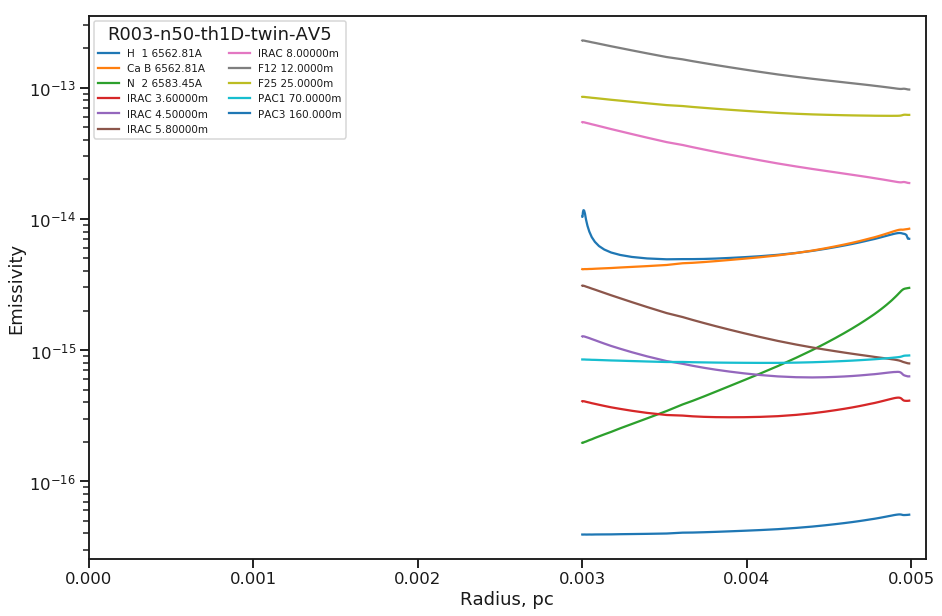

In [48]:
label = "R003-n50-th1D-twin-AV5"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    if band in drop_these_bands:
        continue
    e = em[band]
    ax.plot(r_pc, e, label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[None, None], xlabel="Radius, pc", ylabel=r"Emissivity")
None

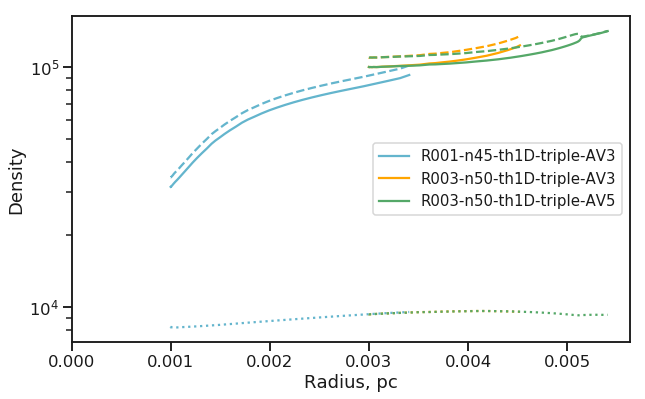

In [51]:
models = ["R001-n45-th1D-triple-AV3", "R003-n50-th1D-triple-AV3", "R003-n50-th1D-triple-AV5"]

fig, ax = plt.subplots(figsize=(10, 6))

for label, color in zip(models, ["c", "orange", "g"]):
    m = cloudytab.CloudyModel(f"models/shell-{label}")
    r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
    ax.plot(r_pc, m.data["ovr"]["hden"], color=color, label=label)
    ax.plot(r_pc, m.data["ovr"]["eden"], color=color, ls="--", label="_nolabel_")
    ax.plot(r_pc, m.data["ovr"]["Te"], color=color, ls=":", label="_nolabel_")


    
ax.legend(loc="best", fontsize="small")
ax.set(xlim=[0, None], ylim=[None, None], yscale='log', xlabel="Radius, pc", ylabel="Density")
None

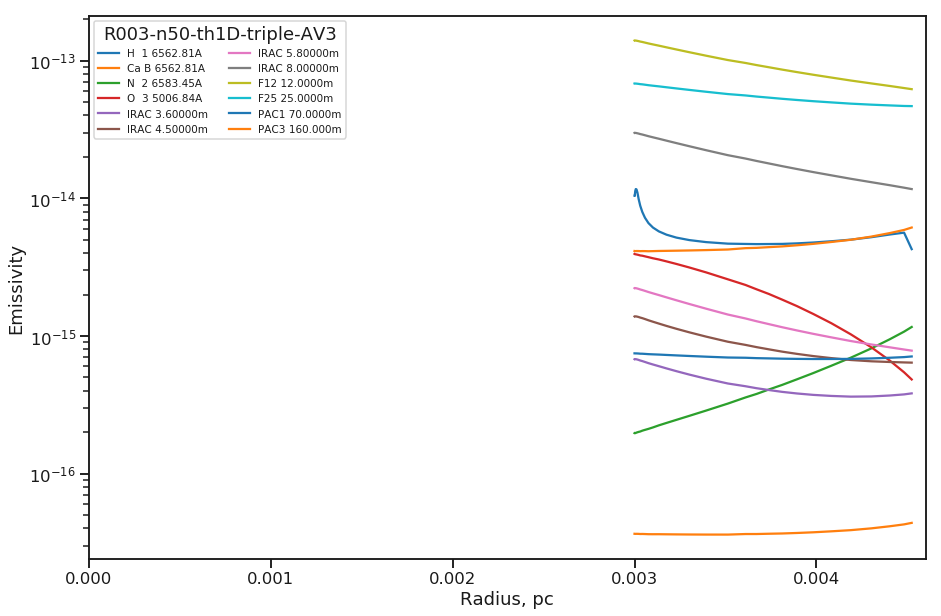

In [53]:
label = "R003-n50-th1D-triple-AV3"
m = cloudytab.CloudyModel(f"models/shell-{label}")
r_pc = m.data["rad"]["radius"]*u.cm.to(u.pc)
em = m.data["emis"]
fig, ax = plt.subplots(figsize=(15, 10))

for band in em.colnames[1:]:
    e = em[band]
    ax.plot(r_pc, e, label=band)
    
ax.legend(ncol=2, fontsize="xx-small", title=label)
ax.set(xlim=[0, None], yscale='log', ylim=[None, None], xlabel="Radius, pc", ylabel=r"Emissivity")
None